In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime, timedelta

# Upload Data

In [4]:
df_cab = pd.read_csv('Cab_Data.csv',sep = ',')
df_city = pd.read_csv('City.csv', sep = ',')
df_customerID = pd.read_csv('Customer_ID.csv', sep = ',')
df_transactionID = pd.read_csv('Transaction_ID.csv', sep = ',')

# Calculate the date 

In [11]:
df_cab['Date of Travel'].min(),df_cab['Date of Travel'].max()

(42371, 43465)

In [12]:
datetime.strftime(datetime(2016,1,31) - timedelta(days= 42371), '%Y-%m-%d')

'1900-01-28'

In [13]:
datetime.strftime(datetime(1900,1,28) + timedelta(days= 42371), '%Y-%m-%d')

'2016-01-31'

In [14]:
datetime.strftime(datetime(1900,1,28) + timedelta(days= 43465), '%Y-%m-%d')

'2019-01-29'

In [15]:
datetime.strftime(datetime(2018,12,31) - timedelta(days= 43465), '%Y-%m-%d')

'1899-12-30'

In [16]:
datetime.strftime(datetime(1899,12,30) + timedelta(days= 42371), '%Y-%m-%d')

'2016-01-02'

### Organize Dataset

In [5]:
df_cab['Date of Travel']=df_cab['Date of Travel'].apply(lambda x: datetime.strftime(datetime(1899, 12, 30) + timedelta(days=x), '%Y-%m-%d'))
df1 = pd.merge(df_cab,df_transactionID, on = 'Transaction ID')
df2 = pd.merge(df1, df_city, on = 'City')
df = pd.merge(df2, df_customerID)
df['year'],df['month'] = pd.DatetimeIndex(df['Date of Travel']).year, pd.DatetimeIndex(df['Date of Travel']).month

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Population          359392 non-null  object 
 10  Users               359392 non-null  object 
 11  Gender              359392 non-null  object 
 12  Age                 359392 non-null  int64  
 13  Income (USD/Month)  359392 non-null  int64  
 14  year                359392 non-null  int64  
 15  month               359392 non-nul

### Plot histogram of numerical data (colunms)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28525239a0>,
      dtype=object)

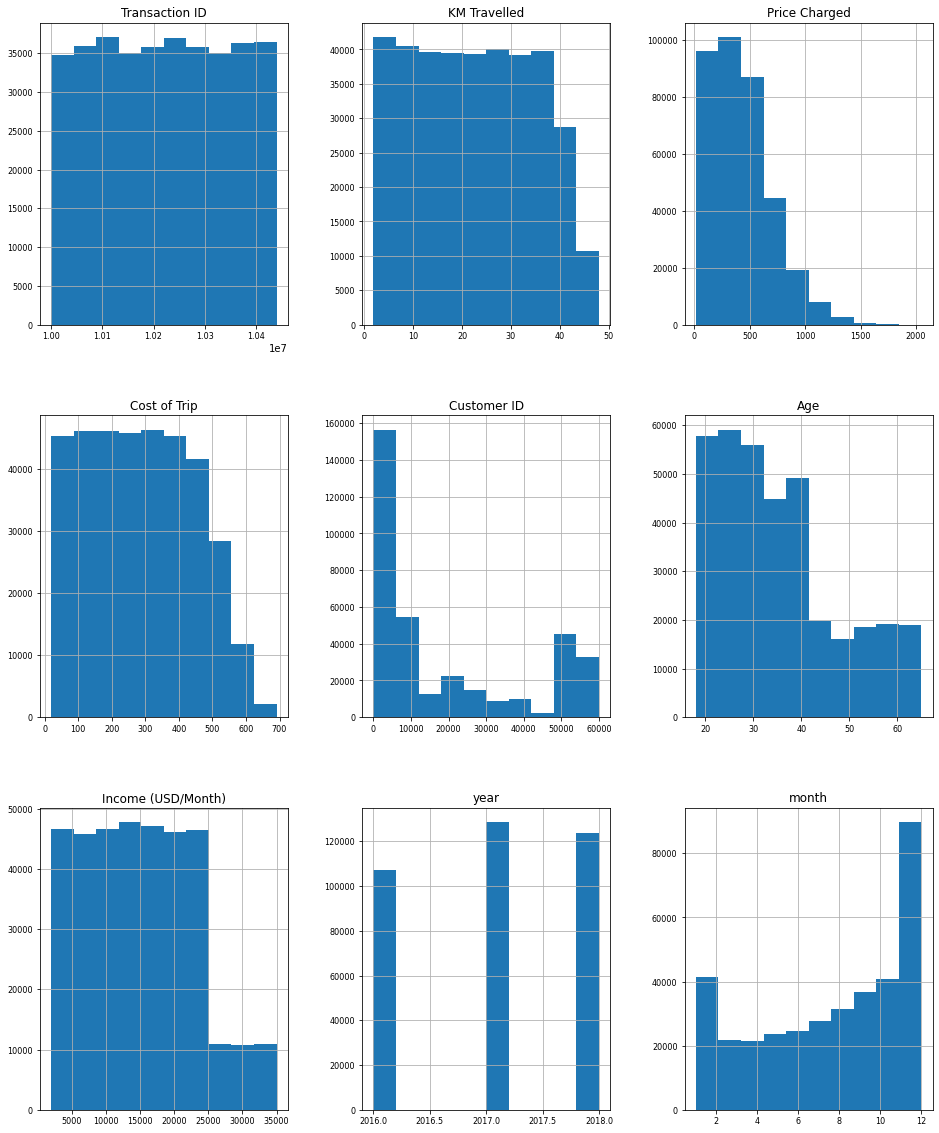

In [13]:
df.hist(figsize=(16,20), xlabelsize=8, ylabelsize=8)

# Descriptive Analysis

## Check Unique Values

In [14]:
df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [15]:
df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [16]:
df['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

In [17]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [18]:
df['year'].unique(), df['month'].unique()

(array([2016, 2018, 2017]),
 array([ 1,  7, 11,  4,  5, 10,  9,  6, 12,  2,  8,  3]))

In [19]:
df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),year,month
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,2017.045199,7.500434
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,0.800239,3.445095
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2016.000000,1.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,2016.000000,5.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,2017.000000,8.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,2018.000000,10.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,2018.000000,12.000000


# Visualization of the statistical analysis

## Profit Analysis

In [22]:
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df['Average Profit per km'] = df['Profit']/ df['KM Travelled']

In [21]:
df.groupby(['Company','City'])['Profit'].sum()

Company     City          
Pink Cab    ATLANTA GA        9.605008e+04
            AUSTIN TX         1.474453e+05
            BOSTON MA         2.620017e+05
            CHICAGO IL        3.187225e+05
            DALLAS TX         2.473011e+04
            DENVER CO         4.058494e+04
            LOS ANGELES CA    1.125732e+06
            MIAMI FL          1.623012e+05
            NASHVILLE TN      6.428453e+04
            NEW YORK NY       1.511474e+06
            ORANGE COUNTY     1.019958e+05
            PHOENIX AZ        3.559639e+04
            PITTSBURGH PA     1.710774e+04
            SACRAMENTO CA     5.532401e+04
            SAN DIEGO CA      6.378898e+05
            SEATTLE WA        1.127813e+05
            SILICON VALLEY    3.402505e+05
            TUCSON AZ         5.928958e+04
            WASHINGTON DC     1.937664e+05
Yellow Cab  ATLANTA GA        7.463828e+05
            AUSTIN TX         3.792557e+05
            BOSTON MA         1.506718e+06
            CHICAGO IL     

In [22]:
df.groupby(['Company','City'])['Profit'].describe()

count        mean         std       min  \
Company    City                                                        
Pink Cab   ATLANTA GA       1762.0   54.511961   67.799455  -96.3350   
           AUSTIN TX        1868.0   78.932168   81.469363 -120.9620   
           BOSTON MA        5186.0   50.520960   62.927089 -150.3800   
           CHICAGO IL       9361.0   34.047910   54.355025 -143.1300   
           DALLAS TX        1380.0   17.920371   58.363932 -220.0600   
           DENVER CO        1394.0   29.114016   66.188412 -129.5400   
           LOS ANGELES CA  19865.0   56.669120   66.037961 -113.8900   
           MIAMI FL         2002.0   81.069526  130.086043 -160.5360   
           NASHVILLE TN     1841.0   34.918269   70.711780 -153.2500   
           NEW YORK NY     13967.0  108.217540   95.864001 -103.9600   
           ORANGE COUNTY    1513.0   67.412976   78.733288  -87.6880   
           PHOENIX AZ        864.0   41.199530   71.107065 -137.5200   
           PITTSBURGH PA     682.0   25.084660   70.441512 -147.4770   
           SACRAMENTO CA    1334.0   41.472273   65.942870 -123.2500   
           SAN DIEGO CA    10672.0   59.772280   62.542443 -100.2300   
           SEATTLE WA       2732.0   41.281601   61.973258 -144.5800   
           SILICON VALLEY   3797.0   89.610358   80.531877  -91.8870   
           TUCSON AZ         799.0   74.204725   98.441283 -129.9900   
           WASHINGTON DC    3692.0   52.482761   59.873333  -89.2600   
Yellow Cab ATLANTA GA       5795.0  128.797723  111.675089  -88.4464   
           AUSTIN TX        3028.0  125.249582  118.649697  -72.8820   
           BOSTON MA       24506.0   61.483619   70.339187 -134.2040   
           CHICAGO IL      47264.0   64.924486   76.860634 -145.9468   
           DALLAS TX        5637.0  195.849415  150.268350   -4.8876   
           DENVER CO        2431.0  146.853175  123.606869  -54.7904   
           LOS ANGELES CA  28168.0  116.656368  104.625538 -115.8580   
           MIAMI FL         4452.0  133.872429  116.606471  -45.4892   
           NASHVILLE TN     1169.0   72.923597   89.188281 -135.8752   
           NEW YORK NY     85918.0  307.864252  201.207094    7.2740   
           ORANGE COUNTY    2469.0  143.785355  147.135267  -56.7772   
           PHOENIX AZ       1200.0  131.120407  115.304407  -53.4684   
           PITTSBURGH PA     631.0  107.857716  155.384801 -118.1952   
           SACRAMENTO CA    1033.0   60.021471   96.069702 -160.7140   
           SAN DIEGO CA     9816.0   96.706775   89.013208  -82.7644   
           SEATTLE WA       5265.0   93.428968   88.968770  -91.2500   
           SILICON VALLEY   4722.0  206.788383  151.065554    2.3176   
           TUCSON AZ        1132.0   71.529258   94.791843 -176.9308   
           WASHINGTON DC   40045.0   82.384912   83.588710 -118.5260   

                                 25%       50%        75%        max  
Company    City                                                       
Pink Cab   ATLANTA GA        8.26200   38.6210   83.55300   460.2900  
           AUSTIN TX        18.90400   55.8060  120.47675   586.3800  
           BOSTON MA         8.94275   34.3880   78.63300   459.6400  
           CHICAGO IL        1.26000   20.7900   56.34800   529.7200  
           DALLAS TX       -14.07800    9.7170   45.34375   253.0000  
           DENVER CO        -7.81150   15.2180   58.79900   392.3600  
           LOS ANGELES CA   11.26000   38.4700   84.75600   585.6220  
           MIAMI FL         11.40650   43.7235  106.06700  1119.4800  
           NASHVILLE TN     -4.41000   16.9900   58.11000   495.3140  
           NEW YORK NY      34.51000   82.8900  157.63100   657.1180  
           ORANGE COUNTY    14.10000   45.5320   97.63600   567.5700  
           PHOENIX AZ       -0.33825   23.2345   72.23025   370.3600  
           PITTSBURGH PA   -11.55025    7.4980   53.20800   444.3550  
           SACRAMENTO CA     1.99750   24.0610   64.31425   438.6760  
           S

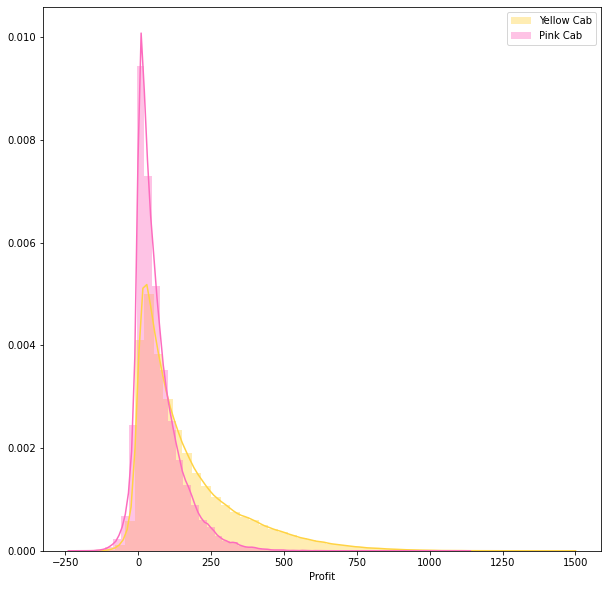

In [23]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(df[df['Company'] == 'Yellow Cab']['Profit'], color = '#ffd343', label = 'Yellow Cab',ax = ax).legend()
sns.distplot(df[df['Company'] == 'Pink Cab']['Profit'], color = '#fd6bbe', label = 'Pink Cab',ax = ax).legend()

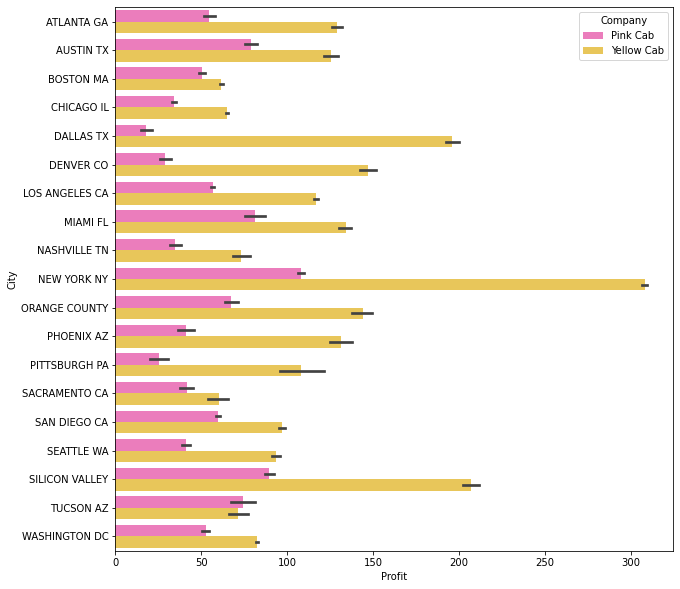

In [24]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
colors = ['#fd6bbe','#ffd343']
customPalette = sns.set_palette(sns.color_palette(colors))
sns.barplot(x = 'Profit', y = 'City', data = df, hue = 'Company', ax = ax, palette=customPalette)

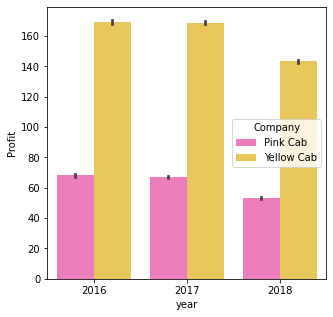

In [25]:
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
colors1 = ['#fd6bbe','#ffd343']
customPalette1 = sns.set_palette(sns.color_palette(colors1))
sns.barplot(x = 'year', y = 'Profit', data = df, hue = 'Company',ax = ax,palette=customPalette1)

In [26]:
df.groupby(['Company'])['Profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Pink Cab,84711.0,62.652174,77.590378,-220.0600,11.206,41.5,93.9650,1119.480
Yellow Cab,274681.0,160.259986,171.823833,-176.9308,37.180,102.0,228.6704,1463.966


### Hypothesis 1
Null hypothesis: Pink Cab's profit is greater than or equal to  Yellow Cab profit
<br> 
Alternative hypothesis: Pink Cab's profit is smaller than Yellow Cab profit

In [27]:
from statsmodels.stats.weightstats import ttest_ind

pink = df[df['Company']=='Pink Cab']
yellow = df[df['Company']=='Yellow Cab']

ttest_ind(pink['Profit'], yellow['Profit'], alternative= 'smaller')

(-160.37151759478056, 0.0, 359390.0)

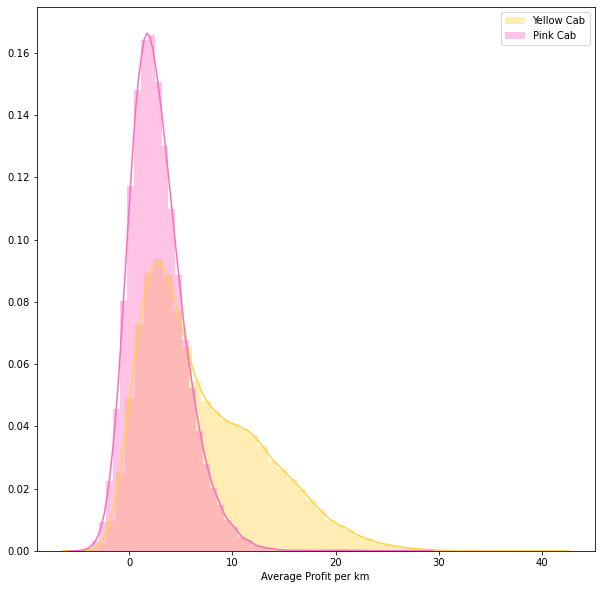

In [186]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(df[df['Company'] == 'Yellow Cab']['Average Profit per km'], color = '#ffd343', label = 'Yellow Cab',ax = ax).legend()
sns.distplot(df[df['Company'] == 'Pink Cab']['Average Profit per km'], color = '#fd6bbe', label = 'Pink Cab',ax = ax).legend()

In [11]:
df[df['Company']=='Pink Cab']['Average Profit per km'].describe()

count    84711.000000
mean         2.769908
std          2.697212
min         -4.912054
25%          0.891572
50%          2.423598
75%          4.281847
max         28.646939
Name: Average Profit per km, dtype: float64

In [12]:
df[df['Company']=='Yellow Cab']['Average Profit per km'].describe()

count    274681.000000
mean          7.105508
std           5.790791
min          -4.998235
25%           2.601667
50%           5.601623
75%          10.889670
max          41.115556
Name: Average Profit per km, dtype: float64

### Hypothesis 2
Null hypothesis: Pink Cab's average profit per km is greater than or equal to  Yellow Cab Average Profit per km
<br> 
Alternative hypothesis: Pink Cab's average profit per km is smaller than Yellow Cab Average Profit per km

In [24]:
from statsmodels.stats.weightstats import ttest_ind

pink = df[df['Company']=='Pink Cab']['Average Profit per km']
yellow = df[df['Company']=='Yellow Cab']['Average Profit per km']

ttest_ind(pink, yellow, alternative="smaller")

(-210.96861574553887, 0.0, 359390.0)

In [30]:
df.drop(['Profit','Average Profit per km'], axis='columns', inplace = True)

## Customer Analysis

In [6]:
df_customer = df.copy()
df_customer.drop_duplicates(subset=['Company','Customer ID'], inplace = True)

In [188]:
df_customer.groupby(['Company','City'])['Customer ID'].count()

Company     City          
Pink Cab    ATLANTA GA        1322
            AUSTIN TX         1354
            BOSTON MA         2463
            CHICAGO IL        2859
            DALLAS TX         1118
            DENVER CO         1145
            LOS ANGELES CA    2996
            MIAMI FL          1480
            NASHVILLE TN      1356
            NEW YORK NY       2972
            ORANGE COUNTY     1198
            PHOENIX AZ         763
            PITTSBURGH PA      604
            SACRAMENTO CA     1078
            SAN DIEGO CA      2909
            SEATTLE WA        1790
            SILICON VALLEY    2130
            TUCSON AZ          684
            WASHINGTON DC     2109
Yellow Cab  ATLANTA GA        2595
            AUSTIN TX         1914
            BOSTON MA         2997
            CHICAGO IL        3000
            DALLAS TX         2564
            DENVER CO         1681
            LOS ANGELES CA    2998
            MIAMI FL          2334
            NASHVILLE TN    

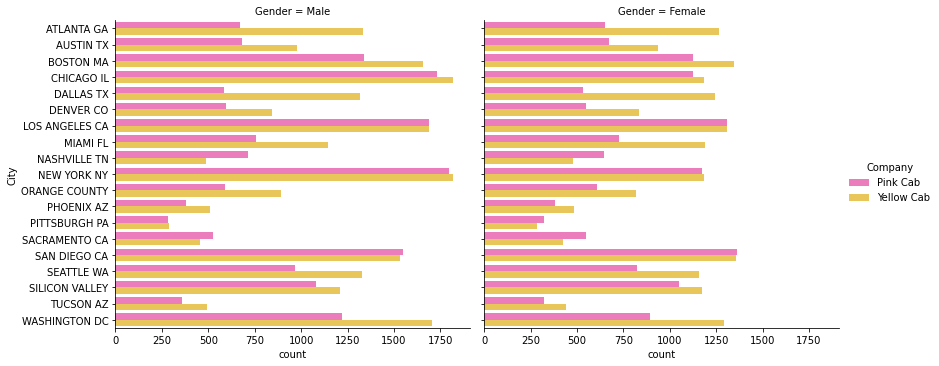

In [179]:
colors2 = ['#fd6bbe','#ffd343']
customPalette2 = sns.set_palette(sns.color_palette(colors2))
sns.catplot(y="City", hue="Company", col="Gender",data=df_income, kind="count", palette=customPalette2, height = 5,aspect = 1.2)

In [98]:
df_count = pd.DataFrame(df.groupby(['Company','Gender'])['Customer ID'].nunique())
df_count

Customer ID
Company    Gender             
Pink Cab   Female        14819
           Male          17511
Yellow Cab Female        18394
           Male          21502

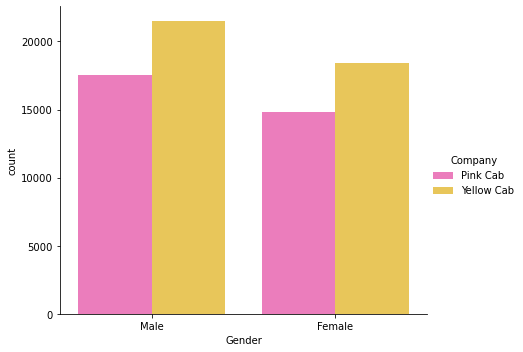

In [10]:
colors3 = ['#fd6bbe','#ffd343']
customPalette3 = sns.set_palette(sns.color_palette(colors3))
sns.catplot(x="Gender", hue="Company",data=df_customer, kind="count", palette=customPalette3, height = 5,aspect = 1.2)

In [11]:
(a/(a+b))

0.5416331580575316

<BarContainer object of 2 artists>

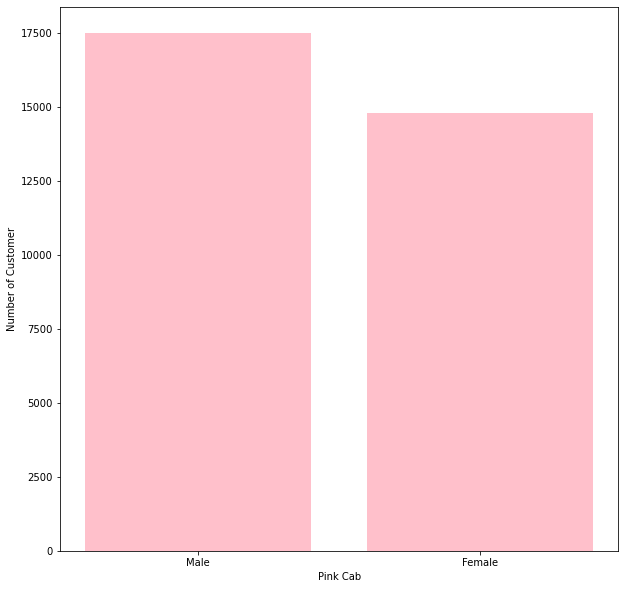

In [29]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
a = df[(df['Company'] == 'Pink Cab') & (df['Gender'] == 'Male')]['Customer ID'].nunique()
b = df[(df['Company'] == 'Pink Cab') & (df['Gender'] == 'Female')]['Customer ID'].nunique()
x = np.array(["Male", "Female"])
ax.set_xlabel('Pink Cab')
ax.set_ylabel('Number of Customer')
y = np.array([a,b])
plt.bar(x,y, color = 'Pink')

Text(0.5, 0, 'Pink Cab')

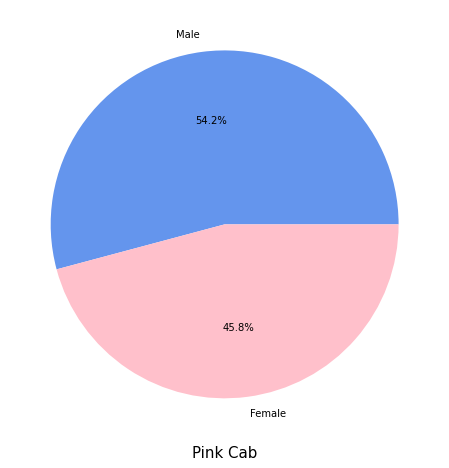

In [41]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
a = df[(df['Company'] == 'Pink Cab') & (df['Gender'] == 'Male')]['Customer ID'].nunique()
b = df[(df['Company'] == 'Pink Cab') & (df['Gender'] == 'Female')]['Customer ID'].nunique()
labels = 'Male','Female'
sizes = [(a/(a+b)), (b/(a+b))]
plt.pie( x= sizes, labels = labels,autopct='%1.1f%%', colors = ['cornflowerblue','pink'])
ax.set_xlabel('Pink Cab',size = 15)

<BarContainer object of 2 artists>

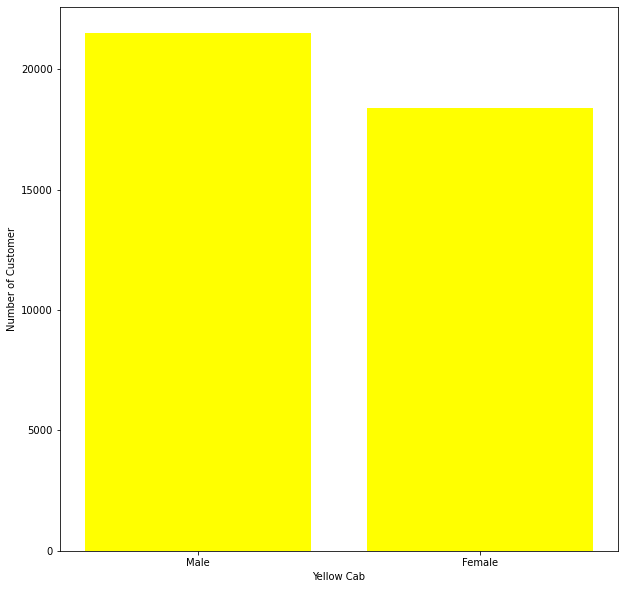

In [223]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
c = df[(df['Company'] == 'Yellow Cab') & (df['Gender'] == 'Male')]['Customer ID'].nunique()
d = df[(df['Company'] == 'Yellow Cab') & (df['Gender'] == 'Female')]['Customer ID'].nunique()
x1 = np.array(["Male", "Female"])
ax.set_xlabel('Yellow Cab')
ax.set_ylabel('Number of Customer')
y1 = np.array([c,d])
plt.bar(x1,y1,color = 'yellow')

Text(0.5, 0, 'Yellow Cab')

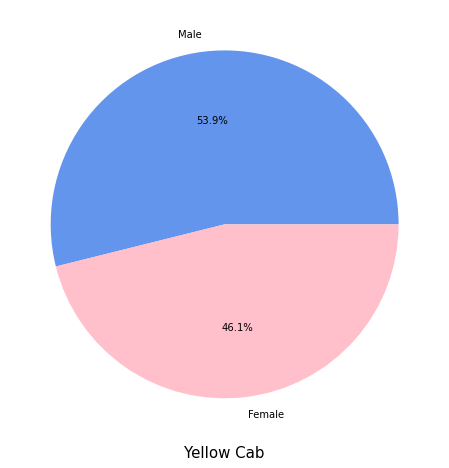

In [42]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
a = df[(df['Company'] == 'Yellow Cab') & (df['Gender'] == 'Male')]['Customer ID'].nunique()
b = df[(df['Company'] == 'Yellow Cab') & (df['Gender'] == 'Female')]['Customer ID'].nunique()
labels = 'Male','Female'
sizes = [(a/(a+b)), (b/(a+b))]
plt.pie( x= sizes, labels = labels,autopct='%1.1f%%', colors = ['cornflowerblue','pink'])
ax.set_xlabel('Yellow Cab',size =15)

In [235]:
print("Pink Cab:",df[(df['Company'] == 'Pink Cab')]['Customer ID'].nunique()) 
print("Yellow Cab:",df[(df['Company'] == 'Yellow Cab')]['Customer ID'].nunique()) 

Pink Cab: 32330
Yellow Cab: 39896


Pink Cab: 44.762273973361395 %
Yellow Cab: 55.23772602663861 %


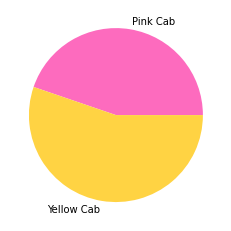

In [248]:
e = df[(df['Company'] == 'Pink Cab')]['Customer ID'].nunique()
f = df[(df['Company'] == 'Yellow Cab')]['Customer ID'].nunique()
plt.pie([e,f], labels = ['Pink Cab','Yellow Cab'])
print("Pink Cab:",e/(e+f)*100,'%')
print("Yellow Cab:",f/(e+f)*100,'%')

### Hypothesis 3
Null hypothesis: Pink Cab has less customers than Yellow Cab has in each city
<br>
Alternative hypothesis: Pink Cab has more customer than Yellow Cab has in each city

In [123]:
from statsmodels.stats.weightstats import ttest_ind

df1 = pd.DataFrame(df_customer.groupby(['Company','City'])['Customer ID'].count())

pink_customer = df1.groupby("Company").get_group("Pink Cab")["Customer ID"].tolist()
yellow_customer = df1.groupby("Company").get_group("Yellow Cab")["Customer ID"].tolist()

ttest_ind(pink_customer,yellow_customer,alternative="larger")

(-1.4634295900210088, 0.9239863971639088, 36.0)

Result: Failed to reject null hypothesis at the significance level of 0.05

In [175]:
df_customer.groupby(['Company'])['Income (USD/Month)'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Pink Cab,32330.0,15034.097618,7999.420516,2000.0,8316.25,14651.5,21057.75,35000.0
Yellow Cab,39896.0,14983.896832,7994.148593,2000.0,8280.75,14619.5,21003.00,34996.0


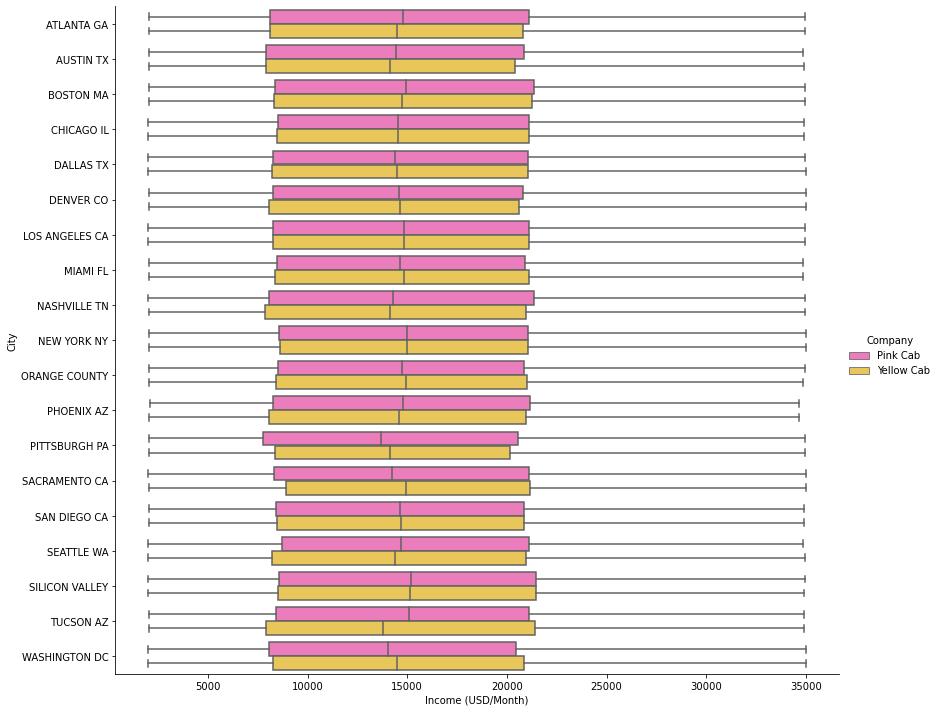

In [8]:
colors4 = ['#fd6bbe','#ffd343']
customPalette4 = sns.set_palette(sns.color_palette(colors4))
sns.catplot("Income (USD/Month)", "City", "Company", data=df_customer, kind="box",height = 10,aspect = 1.2,palette=customPalette4)

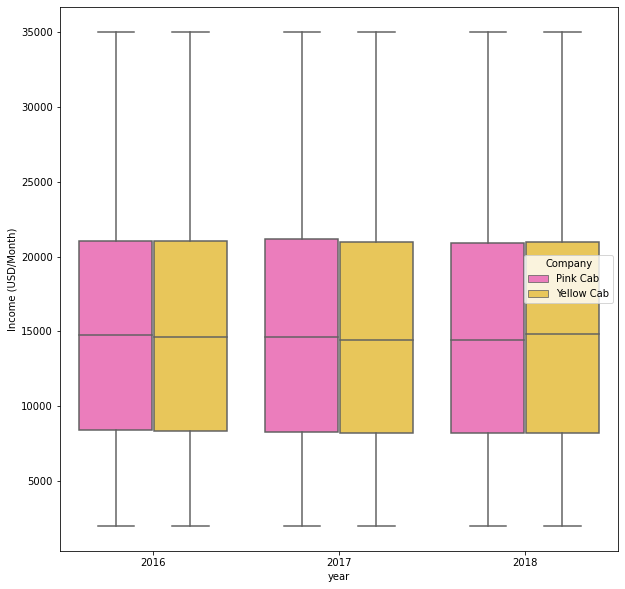

In [18]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='year',y='Income (USD/Month)',hue = 'Company',data = df_customer, ax = ax)

In [28]:
df_customer.groupby(['Company'])['Income (USD/Month)'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Pink Cab,32330.0,15034.097618,7999.420516,2000.0,8316.25,14651.5,21057.75,35000.0
Yellow Cab,39896.0,14983.896832,7994.148593,2000.0,8280.75,14619.5,21003.00,34996.0


### Hypothesis 4
Null hypothesis: The Pink Cab's customers' incomes are the same as Yellow Cab's customers' income
<br>
Alternative hypothesis: The Pink Cab's customers' incomes are not the same as Yellow Cab's customers' income

In [31]:
from scipy.stats import ttest_ind_from_stats
pink_mean = df_customer[df_customer['Company'] == 'Pink Cab']['Income (USD/Month)'].mean()
pink_std = df_customer[df_customer['Company'] == 'Pink Cab']['Income (USD/Month)'].std()
pink_n = df_customer[df_customer['Company'] == 'Pink Cab']['Income (USD/Month)'].count()

yellow_mean = df_customer[df_customer['Company'] == 'Yellow Cab']['Income (USD/Month)'].mean()
yellow_std = df_customer[df_customer['Company'] == 'Yellow Cab']['Income (USD/Month)'].std()
yellow_n = df_customer[df_customer['Company'] == 'Yellow Cab']['Income (USD/Month)'].count()

ttest_ind_from_stats(pink_mean, pink_std, pink_n,
                     yellow_mean, yellow_std, yellow_n)

Ttest_indResult(statistic=0.8389398957922386, pvalue=0.40150581507996697)

Result: Failed to reject null hypothesis at the significance level of 0.05

In [15]:
df_customer.groupby(['Company','Payment_Mode'])['Customer ID'].count()

Company     Payment_Mode
Pink Cab    Card            19434
            Cash            12896
Yellow Cab  Card            23990
            Cash            15906
Name: Customer ID, dtype: int64

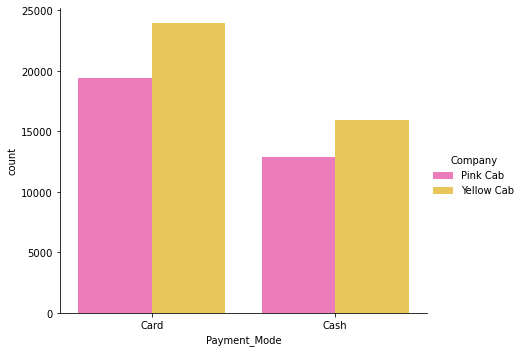

In [11]:
colors4 = ['#fd6bbe','#ffd343']
customPalette4 = sns.set_palette(sns.color_palette(colors4))
sns.catplot(x="Payment_Mode", hue="Company",data=df_customer, kind="count", palette=customPalette4, height = 5,aspect = 1.2)

In [87]:
df_customer['Age'].describe()

count    72226.000000
mean        35.352311
std         12.603270
min         18.000000
25%         25.000000
50%         33.000000
75%         42.000000
max         65.000000
Name: Age, dtype: float64

In [88]:
df_customer['Age Group'] = ''
df_customer.loc[(df_customer['Age'] >= 18) & (df_customer['Age'] <= 30),'Age Group'] = 'Young Age between 18 and 30'
df_customer.loc[(df_customer['Age'] > 30) & (df_customer['Age'] <= 50),'Age Group'] = 'Middle Age between 31 and 50'
df_customer.loc[(df_customer['Age'] > 50),'Age Group'] = 'Old Age between 51 and 65'
df_customer.groupby(['Company','Age Group'])['Payment_Mode'].count()

Company     Age Group                   
Pink Cab    Middle Age between 31 and 50    13707
            Old Age between 51 and 65        5146
            Young Age between 18 and 30     13477
Yellow Cab  Middle Age between 31 and 50    16970
            Old Age between 51 and 65        6295
            Young Age between 18 and 30     16631
Name: Payment_Mode, dtype: int64

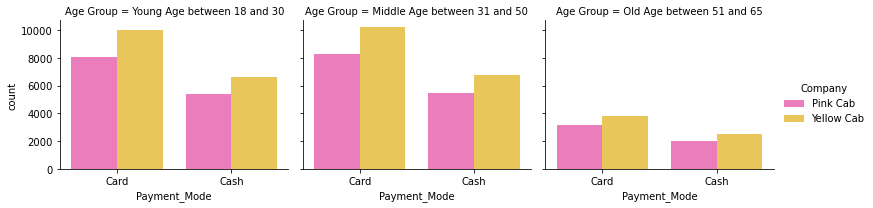

In [93]:
colors5 = ['#fd6bbe','#ffd343']
customPalette5 = sns.set_palette(sns.color_palette(colors5))
sns.catplot(x="Payment_Mode", hue="Company",col = 'Age Group',col_order = ['Young Age between 18 and 30','Middle Age between 31 and 50','Old Age between 51 and 65'],data=df_customer, kind="count", palette=customPalette5, height = 3,aspect = 1.2)

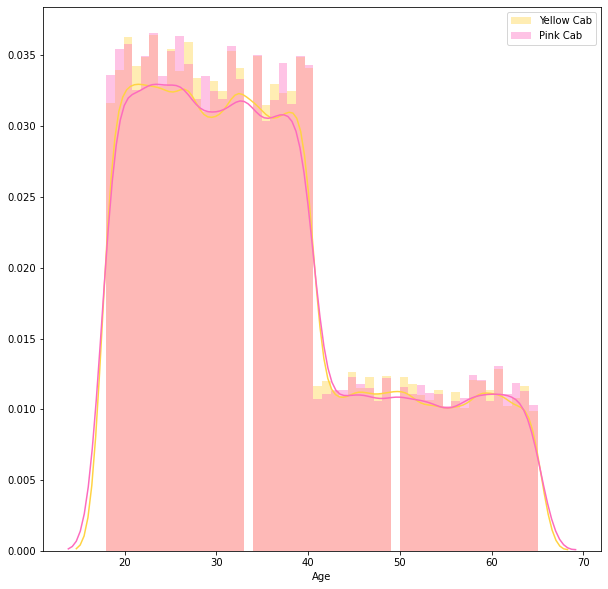

In [105]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(df[df['Company'] == 'Yellow Cab']['Age'], color = '#ffd343', label = 'Yellow Cab',ax = ax).legend()
sns.distplot(df[df['Company'] == 'Pink Cab']['Age'], color = '#fd6bbe', label = 'Pink Cab',ax = ax).legend()

### Hypothesis 5
Null hypothesis: Pink Cab's customers' ages are the same as Yellow Cab's customers' ages
<br>
Alternative hypothesis: Pink Cab's customers' ages are not the same as Yellow Cab's customers' ages

In [106]:
from statsmodels.stats.weightstats import ttest_ind

pink_customer = df_customer[df_customer['Company']=='Pink Cab']['Age']
yellow_customer = df_customer[df_customer['Company']=='Yellow Cab']['Age']

ttest_ind(pink_customer,yellow_customer,alternative="two-sided")

(0.3163375997512036, 0.7517471890396208, 72224.0)

Results: Failed to reject null hypothesis

In [19]:
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month),year,month
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,"814,885","24,701",Male,28,10813,2016,1
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,"814,885","24,701",Male,28,10813,2018,7
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,"814,885","24,701",Male,28,10813,2018,11
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,"814,885","24,701",Male,27,9237,2016,1
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,"814,885","24,701",Male,27,9237,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,"418,859","127,001",Female,29,6829,2018,3
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,"418,859","127,001",Female,29,6829,2018,4
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,"418,859","127,001",Female,29,6829,2018,7
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,"418,859","127,001",Female,29,6829,2018,8
